In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
import camb
from camb import model, initialpower



In [ ]:
# Initialize parameters of CAMB model
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
#pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0)

#calculate results for these parameters
results = camb.get_results(pars)
Cl_allpol = results.get_cmb_power_spectra(pars, CMB_unit='muK', spectra={'total'})['total']     # the C_l returned is already binned as l*(l+1)+C_l/(2pi)

Cl_boltz = Cl_allpol[:,0]                                                          # we only need the TT/II polarization (i.e. the temperature)
l_boltz = np.arange(Cl_boltz.shape[0])

In [ ]:
fig, ax = plt.subplots(figsize = (13,9))
ax.plot(l_boltz, Cl_boltz, color='k')
ax.set_title('Boltzmann Code Power Spectrum')

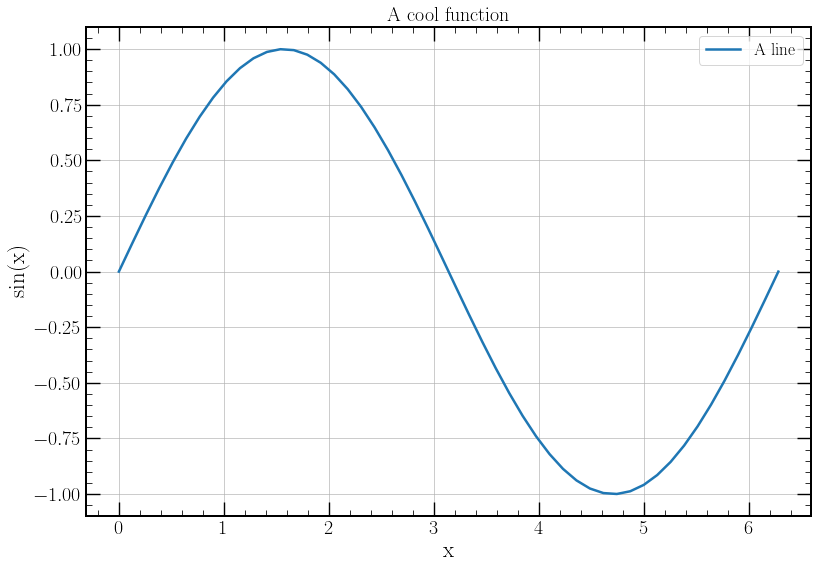

In [2]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'


import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot

#jtplot.style(theme='grade3', context='poster', ticks=True)

plt.figure(figsize=(13,9))
x = np.linspace(0,2*np.pi)
plt.plot(x, np.sin(x), label='A line')

plt.title('A cool function')
plt.xlabel('x'); plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import seaborn as sns

sns.set_context("notebook")

sns.lineplot(x=[0, 1, 2], y=[1, 3, 2])
